In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pose
import CurvePlan
import Kinematics

SuckPoint分析

In [79]:
pose_quat = np.array([
    [0.3999999463558197, -0.11999998241662979, 0.1499999761581421, 0.788010835647583, 0.6156615018844604, -2.6911418871122805e-08, -3.4445047703002274e-08],
    [0.3999999463558197, 0.12000001966953278, 0.15000000596046448, 0.8241262435913086, 0.56640625, -2.4758406880209805e-08, -3.602370668431831e-08],
    [0.4000002443790436, -0.039999812841415405, 0.12499968707561493, -0.8983561396598816, -0.21567364037036896, -0.0893283560872078, -0.3721042573451996],
    [0.399999737739563, 0.04000016301870346, 0.12499992549419403, -0.3423539102077484, -0.8581100106239319, -0.3554311990737915, -0.14180892705917358]
])

p = np.zeros((4, 6))
for i in range(4):
    p[i, :3] = pose_quat[i, :3]
    p[i, 3:] = pose.Quat2EulerXYZ(pose_quat[i, 3:])
    
shift = np.array([
    [0, 0, 0, 0],
    [0, 3, 3, 0],
    [0, 0, 0, 0]
]).T / 180 * np.pi

p[:, 3:] -= shift

for i in range(4):
    joint = Kinematics.IKSolver(p[i], check = True) * 180 / np.pi
    print(i, joint)
    print()

0 [[  -8.57272861   84.61843571   32.89125461    3.36403426 -106.37135644
   121.92826195]
 [-182.00819207  -87.95969079  -36.64875522   26.60810741   75.85954121
    98.24693805]]

1 []

2 []

3 [[   9.24193213   77.20039895   58.32667209  -74.53745061  -33.95917177
    45.20950481]
 [-163.58282361  -75.08863292  -60.97465203   70.48203628  142.80926536
    53.0906906 ]]



梯形速度规划分析

In [3]:
q0_3 = np.array([1.78573354e+00,  8.69491077e-01,  1.25136065e+00, -5.50055400e-01, 2.61200120e-17, -2.92665544e+00])
q0_4 = np.array([0.03586224, -1.40004318, -1.18267219,  0.97607984, -0.78475539, -1.62149148])
t_f = 2
acc = 5 * np.ones_like(q0_3)

ts = np.linspace(0, t_f, 100)

res = np.zeros((100, 6))
for i in range(100):
    res[i] = CurvePlan.TrapezoidPlan(q0_3, q0_4, acc, t_f, ts[i])

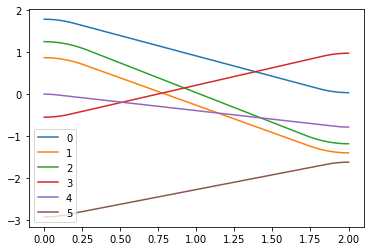

In [16]:
for i in range(6):
    plt.plot(ts, res[:, i], label = str(i))
plt.legend()